#### 머신러닝의 7과정
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리(결측치, 이상치, 특성공학)
4. 탐색적 데이터 분석(기술통계량, 시각화)
5. Model 선택, Hyper Parameter 조정
6. Model 학습 (fit)
7. Model 평가

### 1. 문제정의 (목표)
- 500명의 키와 몸무게, 비만도 레이블을 이용해서 비만 정도를 판단하는 모델을 만들어보자

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [15]:
df = pd.read_csv('./data/bmi_500.csv', index_col='Label')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB
None


### 3. 데이터 전처리
- 전처리가 필요없는 학습용 데이터

### 4. 탐색적 데이터 분석
- 데이터의 특성 파악

In [18]:
df['Height'].value_counts().head(3)

Height
188    15
179    14
187    14
Name: count, dtype: int64

In [19]:
df['Gender'].value_counts().head(3)

Gender
Female    255
Male      245
Name: count, dtype: int64

In [20]:
# 기술통계치 확인(수치형, 문자형 데이터가 섞여있을 경우, 수치형 데이터에 대해서만 출력)
# descirbe
df.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [22]:
df.describe(include='all')

,Gender,Height,Weight
count,500,500.000000,500.000000
unique,2,NaN,NaN
top,Female,NaN,NaN
freq,255,NaN,NaN
mean,NaN,169.944000,106.000000
std,NaN,16.375261,32.382607
min,NaN,140.000000,50.000000
25%,NaN,156.000000,80.000000
50%,NaN,170.500000,106.000000
75%,NaN,184.000000,136.000000


In [28]:
df.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [37]:
df.index.value_counts()

Label
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

In [34]:
df.loc['Extreme Obesity']

,Gender,Height,Weight
Label,,,
Extreme Obesity,Male,147,92
Extreme Obesity,Male,154,111
Extreme Obesity,Female,153,107
Extreme Obesity,Female,157,110
Extreme Obesity,Male,140,129
...,...,...,...
Extreme Obesity,Male,152,98
Extreme Obesity,Female,150,153
Extreme Obesity,Female,141,136


In [36]:
df.loc['Extreme Obesity'].shape

(198, 3)

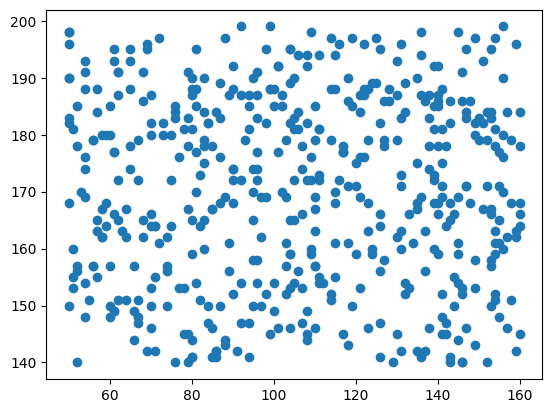

In [40]:
# 데이터 시각화
# 산접도 그래프로 전체 데이터 시작화
# scatter(x축, y축)
plt.scatter(df['Weight'], df['Height'])
plt.show()

### 각 비만도 등급(6개) 별로 시각화

In [55]:
# 키와 몸무게 데이터를 등급별로 구분하여 산점도를 표시하는 함수를 만들어보자!
def myScatter(class_name, color): # 매개변수로는 정답과 색상
    # 입력한 클래스 명칭에 대한 데이터만 추출
    tmp = df.loc[class_name] # 매개변수로 받아준 class_name 데이터만

    # 산점도 그래프 출력
    plt.scatter(tmp['Weight'], 
                tmp['Height'], 
                c = color, 
                label = class_name) # 범례 출력시 테스트

In [56]:
df.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

Text(0, 0.5, 'Height')

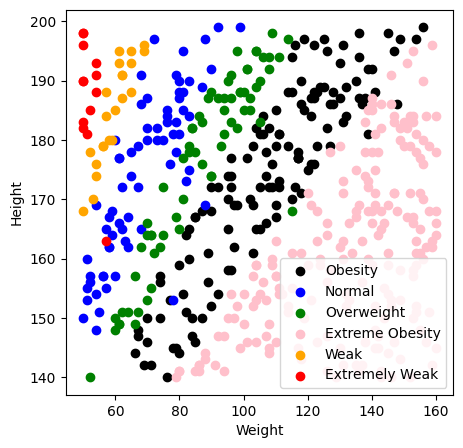

In [68]:
plt.figure(figsize = (5,5))

# 선언된 함수에 클래스명과 색상을 입력
myScatter('Obesity', 'black')
myScatter('Normal', 'blue')
myScatter('Overweight', 'green')
myScatter('Extreme Obesity', 'pink')
myScatter('Weak', 'orange')
myScatter('Extremely Weak', 'red')

plt.legend() # 범례
plt.xlabel('Weight')
plt.ylabel('Height')

- 산점도를 통해 몸무게와 키에 따른 데이터의 분포를 직관적으로 확인 가능

#### 5. 모델링(모델선택, 학습, 평가)
- 1. 문제와 정답 분리
  2. train, test셋으로 분리
  3. 모델 생성
  4. 학습 및 평가
  5. 하이퍼파라미터 조정 및 평가 

In [71]:
df = pd.read_csv('./data/bmi_500.csv')
df

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [73]:
# 문제(X), 정답(y)로 분리
X = df.loc[ : , ['Height','Weight']]
y = df.loc[ : , 'Label']

In [74]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [78]:
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [79]:
df

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [84]:
# 문제와 정답, 학습과 평가 데이터로 분리
X_train = X.loc[:349,:]
X_test = X.loc[350:,:]
y_train = y.loc[:349]
y_test = y.loc[350:]

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [87]:
knn_model = KNeighborsClassifier(n_neighbors = 18)

In [88]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [90]:
# 예측값 변수에 저장 및 출력
pred = knn_model.predict(X_test)

In [91]:
pred

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Weak', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Normal', 'Extreme Obesity',
       'Obesity', 'Overweight', 'Normal', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Overweight',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Normal', 'Obesity', 'Obesity', 'Extreme Obesity',
       'Normal', 'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Normal', 'Obesity', 'Extreme Obes

In [93]:
# 모델이 예측한 결과값과 실제 정답을 넣고 정확도 평가
metrics.accuracy_score(pred, y_test)

0.8933333333333333

In [95]:
knn_model.score(X_test, y_test)

0.8933333333333333

In [99]:
# 정확도 외 다른 지표들도 한번에 보자!
from sklearn.metrics import classification_report

In [101]:
print(classification_report(pred, y_test))

                 precision    recall  f1-score   support

Extreme Obesity       0.98      0.93      0.95        67
 Extremely Weak       1.00      1.00      1.00         3
         Normal       0.96      0.75      0.84        32
        Obesity       0.86      0.94      0.90        32
     Overweight       0.85      0.92      0.88        12
           Weak       0.36      1.00      0.53         4

       accuracy                           0.89       150
      macro avg       0.84      0.92      0.85       150
   weighted avg       0.92      0.89      0.90       150



In [107]:
knn_model.predict([[ 178, 85 ]])  

/home/jsock/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Overweight'], dtype=object)

In [110]:
my_info = pd.DataFrame([[178,85]], columns = ['Height', 'Weight'])
my_info

,Height,Weight
0,178,85


In [111]:
knn_model.predict(my_info)  

array(['Overweight'], dtype=object)